<h3>Instalando e Carregando os Pacotes</3>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook: ', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook:  3.7.4


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terinal ou prompt de comendo;
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, exxecute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Instala o pacote watermark
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter_notebook.
# !pip install -q -U watermark

# Updating pip install
# !python -m pip install --upgrade pip

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
mat.rcParams['axes.labelsize'] = 14
mat.rcParams['xtick.labelsize'] = 12
mat.rcParams['ytick.labelsize'] = 12
mat.rcParams['text.color'] = 'k'

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Abaduba" --iversions

Author: Abaduba

matplotlib : 3.1.1
numpy      : 1.17.1
seaborn    : 0.9.0
pandas     : 0.25.1
statsmodels: 0.13.5



<h3>Carregando e Explorando os Dados</h3>

In [5]:
# Carregando os Dados
base_b3 = pd.read_csv("\projetos\IA Aplicada a Financas\Projeto 1\dataset.csv", header = None)

In [6]:
# Visualizando os Dados
base_b3.head()

,0,1
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


<n>Uma série temporal é um conjunto sequencial de pontos de dados, medido tipicamente em tempos sucessivos. Esses dados representam uma série univariada, pois temos uma variável aleatória (valor d título público) e a data, que representa o índice da série. Veja que a série é mensal. </n>

In [7]:
# Ajustando o nome de cada coluna
base_b3.columns = ['mes', 'valor_titulo']

In [8]:
# Visualizando os dados
base_b3.head()

,mes,valor_titulo
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [11]:
# Resumo estatístico da variável valor_título.
base_b3.describe()

,valor_titulo
count,144.00000
mean,280.31250
std,119.95369
min,104.00000
25%,180.00000
50%,265.50000
75%,360.50000
max,622.00000


In [9]:
# Qual será o mês com o título de maior valor?
base_b3.max()

mes             2015-12
valor_titulo        622
dtype: object

In [10]:
# Vamos coletar o período completo da série temporal
print('Início do período de tempo: {}\nFinal do Período de Tempo: {}'.format(base_b3.mes.min(), base_b3.mes.max()))

Início do período de tempo: 2004-01
Final do Período de Tempo: 2015-12


In [11]:
# Shape dos dados
base_b3.shape

(144, 2)

In [12]:
# Tipo dos Dados
base_b3.dtypes

mes             object
valor_titulo     int64
dtype: object

<n>Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.</n>

In [13]:
# Tipo do objeto
type(base_b3)

pandas.core.frame.DataFrame

<h3>Processamento e Visualização dos Dados</h3>

<n>Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.</n>

In [14]:
#Converter para o formato de data
base_b3['mes'] = pd.to_datetime(base_b3['mes'], format='%Y-%m')

In [15]:
# Visualizando os Dados
base_b3.head()

,mes,valor_titulo
0,2004-01-01,112
1,2004-02-01,118
2,2004-03-01,132
3,2004-04-01,129
4,2004-05-01,121


In [16]:
# Informações dos Dados
base_b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
mes             144 non-null datetime64[ns]
valor_titulo    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [17]:
# Vamos transformar a coluna de data no índice do conjunto de dados.
base_b3_serie = base_b3.set_index('mes')

In [18]:
# Localizando um registro dos dados através do índice
base_b3_serie.loc['2004-01-01']

valor_titulo    112
Name: 2004-01-01 00:00:00, dtype: int64

In [19]:
# Visualizando os Dados
base_b3_serie.head()

,valor_titulo
mes,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


In [20]:
# Visualizando o Índice
base_b3_serie.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01', '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [21]:
# Será que algum valor nulo está presente nos dados?
base_b3_serie.isnull().sum()

valor_titulo    0
dtype: int64

<h3>Análises de Tendências</h3>

<b>Plot da Série Temporal - Primeira Análise de Tendência</b>

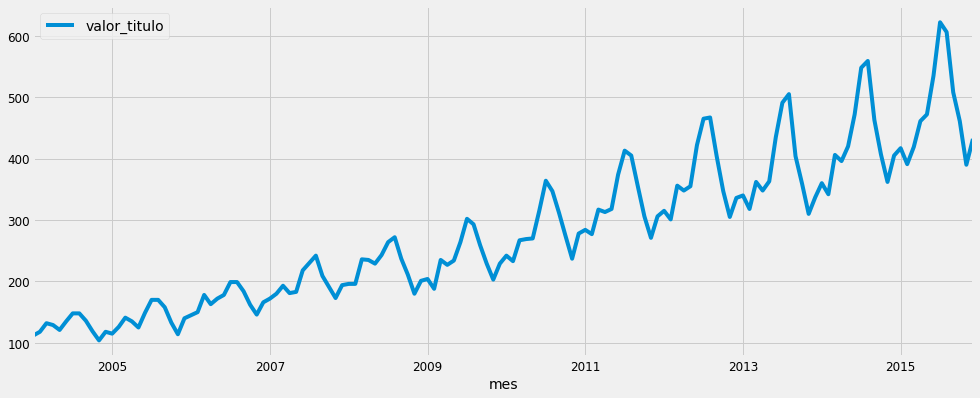

In [22]:
# Plot da Série Temporal - aqui ja observamos algumas tendências.
base_b3_serie.plot(figsize = (15, 6))
plt.show()

<n>O gráfico cima mostra 2 componentes da série temporal:
* Sazonalidade: o fenômeno se repete em períodos fixos.
* Tendência: ao longo do tempo, a série segue uma tendência de crescimento.</n>

<n>Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito cíclico com efeito sazonal.
<br>
<br>
    Então, como diferencial um padrão "cíclico" versus "sazonal"?
<br>
<br>
    Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.
</n>

<b>Gráfico de Densidade - Segunda Análise de Tendência</b>

<n>Analisar o gráfico de densidade de observações pode fornecer mais informações sobre a estrutura dos dados.</n>

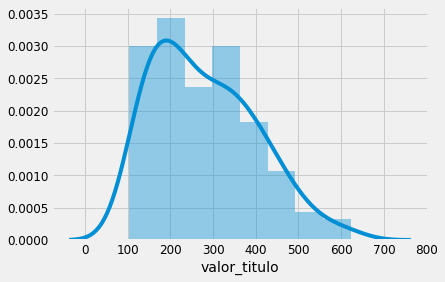

In [23]:
sns.distplot(base_b3_serie['valor_titulo'])

In [48]:
## Gráfico de Densidade
## Plot
# plt.figure(1)

## Primeiro Sublot
# plt.subplot(211)
# base_b3_serie.valor_titulo.hist()

## Segundo Subplot
# plt.subplot(212)
# base_b3_serie.valor_titulo.plot(kind = 'kde')
# plt.show()

<n>Análise:
* A distribuição não é perfeitamente gaussiana (distribuição normal).
* A distribuição está inclinada para a esquerda.
* As transformações podem ser úteis antes da modelagem.</n>

<n>Observação: a ideal para aplicar qualquer tipo de modelagem, incluindo IA, é aplicando transformações sobre os dados para que se tenham dados normalizados, na mesma escala, etc. Quando uma variável segue uma distribuição gaussiana, ela tem um cojunto útil de propriedades.</n>

<b>BoxPlots - Terceira Análise de Tendência</b>

Text(0, 0.5, '\nValor do Título')

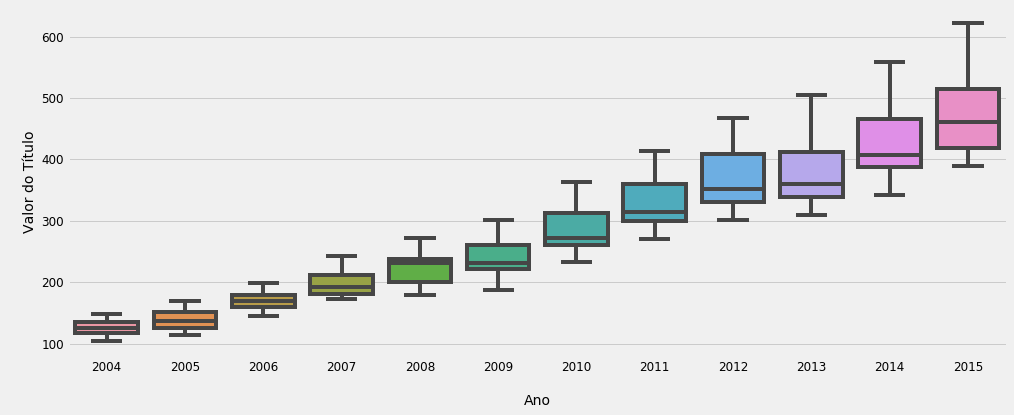

In [24]:
# Defina a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15, 6))

# Define as variáveis
indice_ano = base_b3_serie.valor_titulo.index.year
valor = base_b3_serie.valor_titulo

# Cria uma boxplot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = base_b3_serie)

plt.xlabel("\nAno")
plt.ylabel("\nValor do Título")

<n>Análise:
* Valores medianos ao longo dos anos confirmam uma tendência ascendente;
* Aumento constante da dispersão do meio (mediana) dos dados ao longo do tempo. As caixas vão se tornanda cada vez maiores;
* Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.
</n>

<b>Comparação Lado a Lado - Quarta Análise de Tendência</b>

<n>Como é uma série temporal mensal e segue um determinado padrão repetitivo todos os anos, você pode plotar cada ano como uma linha separada no mesmo gráfico. Isso permite comparar os padrões do ano lado a lado.
<br>
Observe que agora precisamos da data como uma coluna de texto e não mais como índice.
</n>

In [30]:
# Prepare os dados
x = base_b3['mes'].values
y1 = base_b3['valor_titulo'].values

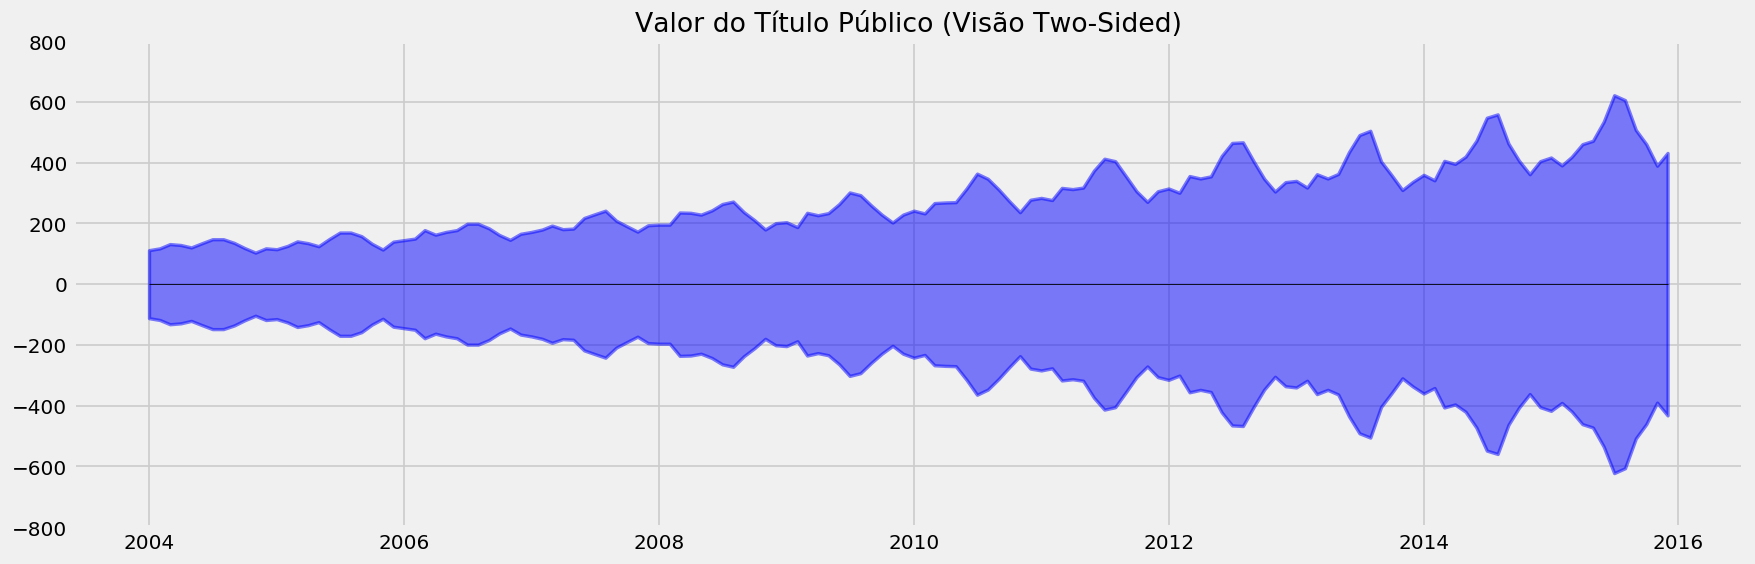

In [32]:
# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16, 5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')

# Limites do eixo y
plt.ylim(-800, 800)

# Título
plt.title('Valor do Título Público (Visão Two-Sided)', fontsize = 16)

# Limites das linhas
plt.hlines(y = 0, xmin = np.min(base_b3.mes), xmax = np.max(base_b3.mes), linewidth = .5)

# Mostra o gráfico
plt.show()

<n>Análise:
* O gráfico mostra a linha de cada ano, todas juntas. Observamos que o padrão é muito parecido em todos os anos.
* Mas a única forma de ter erteza sobre o padrão dos dados ao longo do tempo é decompor a série e então analisar seus componentes de forma individual.
</n>